In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [15]:

archivo_excel = 'test_sumativo_data.xlsx'
escuelas = pd.read_excel(archivo_excel, sheet_name='Escuelas')
furgones = pd.read_excel(archivo_excel, sheet_name='Furgones')



In [16]:
escuelas

,Escuela,Ubicación en x,Ubicación en y,Tipo,Cantidad de estudiantes
0,Escuela 1,93,63,Básica,507
1,Escuela 2,54,80,Completa,1120
2,Escuela 3,72,28,Media,519
3,Escuela 4,16,14,Media,829
4,Escuela 5,6,86,Completa,727
5,Escuela 6,24,7,Completa,996
6,Escuela 7,99,83,Básica,518
7,Escuela 8,89,22,Básica,1080
8,Escuela 9,63,57,Completa,930
9,Escuela 10,30,55,Completa,723


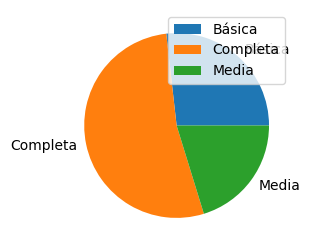

In [38]:
escuelas[['Tipo','Cantidad de estudiantes']].groupby('Tipo').sum().plot.pie(y='Cantidad de estudiantes', figsize = (3,3))
plt.ylabel('')
plt.show()

In [9]:
furgones

,Furgón,Escuela a la que pertenece,Capacidad del furgón,Costo transporte alumno/año [MM$]
0,Furgón 1,Escuela 15,30,0.008
1,Furgón 2,Escuela 7,35,0.007
2,Furgón 3,Escuela 8,35,0.007
3,Furgón 4,Escuela 10,20,0.008
4,Furgón 5,Escuela 13,35,0.009
...,...,...,...,...
70,Furgón 71,Escuela 15,20,0.008
71,Furgón 72,Escuela 20,30,0.006
72,Furgón 73,Escuela 16,20,0.006
73,Furgón 74,Escuela 16,30,0.004


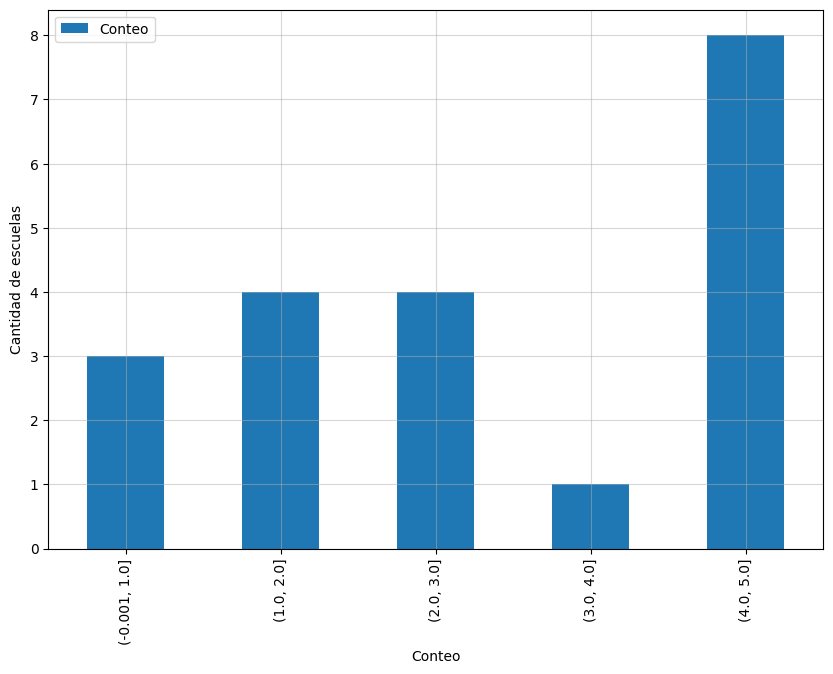

In [25]:
p2 = furgones[['Furgón', 'Escuela a la que pertenece']].groupby('Escuela a la que pertenece').count()
p2['Conteo'] = p2.apply(lambda row: row.Furgón if row.Furgón < 5 else 5, axis = 1)
p2.groupby([pd.cut(p2["Conteo"], np.arange(0, 6, 1), include_lowest = True)]).count().plot(y = 'Conteo', kind='bar', figsize = (10,7))
plt.ylabel('Cantidad de escuelas')
plt.grid(alpha = 0.5)
plt.show()

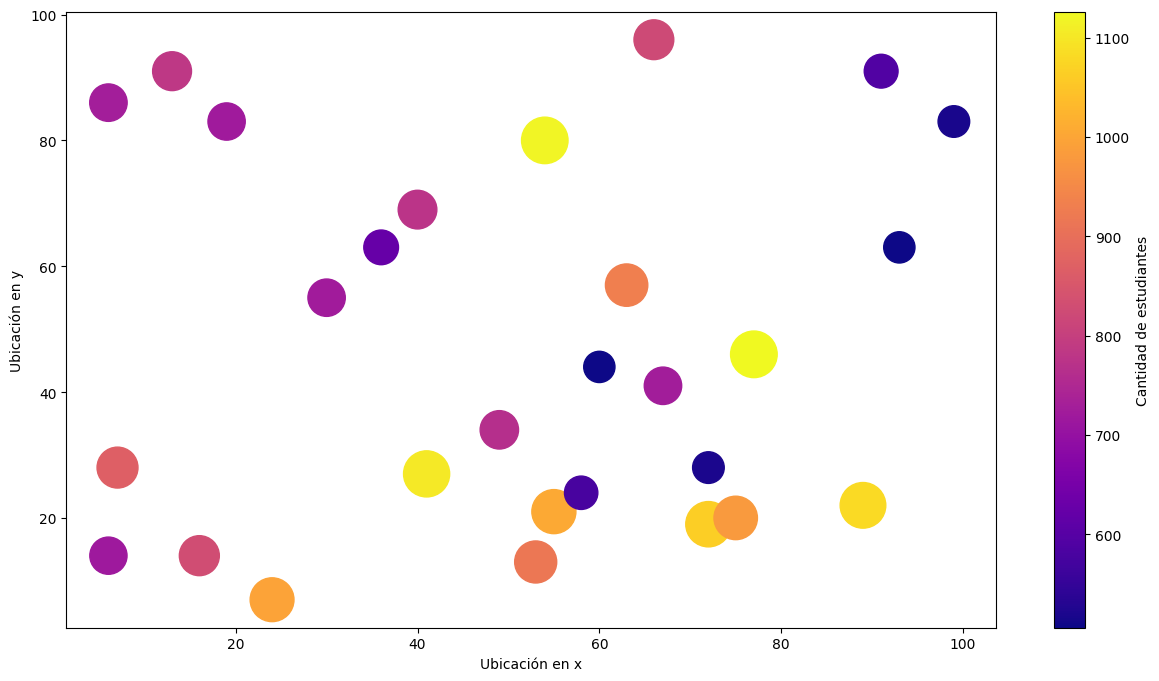

In [33]:
escuelas.plot.scatter(x='Ubicación en x', y='Ubicación en y', s='Cantidad de estudiantes', c = 'Cantidad de estudiantes', colormap = 'plasma', figsize = (15,8))
plt.show()

In [36]:
furgones.head(4)

,Furgón,Escuela_pertenece,Capacidad,Costo_alumno_año,Costo_total
0,Furgón 1,Escuela 15,30,0.008,0.240
1,Furgón 2,Escuela 7,35,0.007,0.245
2,Furgón 3,Escuela 8,35,0.007,0.245
3,Furgón 4,Escuela 10,20,0.008,0.160


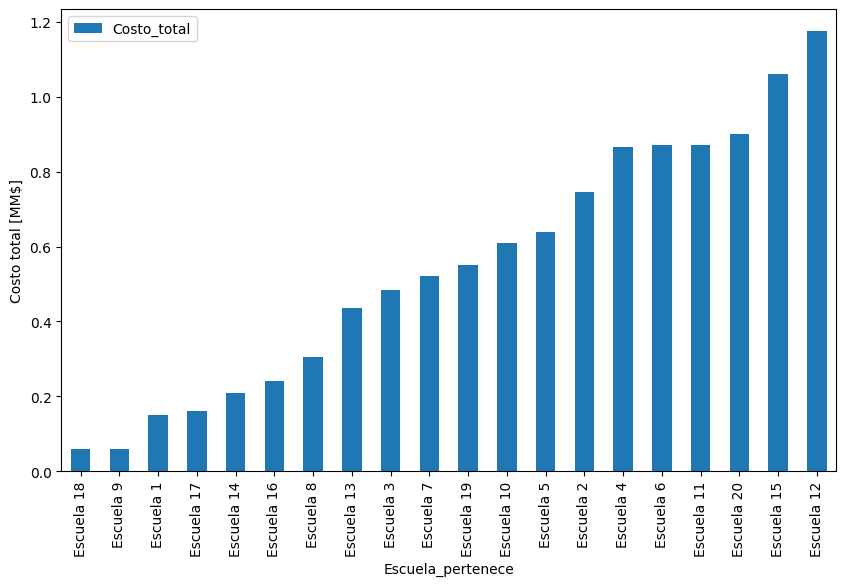

In [35]:
furgones.columns = ['Furgón', 'Escuela_pertenece', 'Capacidad', 'Costo_alumno_año']
furgones['Costo_total'] = furgones.apply(lambda row: row.Capacidad*row.Costo_alumno_año, axis = 1)
furgones[['Escuela_pertenece', 'Costo_total']].groupby('Escuela_pertenece').sum().sort_values(by = 'Costo_total', ascending = True).plot(kind = 'bar', figsize = (10,6))
plt.ylabel('Costo total [MM$]')
plt.show()

In [51]:
p5 = furgones[['Capacidad', 'Escuela_pertenece']].groupby(['Escuela_pertenece', 'Capacidad']).sum().reset_index()
p5 = p5.groupby('Capacidad').count().reset_index()
fig = px.treemap(p5, path=['Capacidad', 'Escuela_pertenece'], values='Escuela_pertenece')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [47]:
p5 = furgones[['Capacidad', 'Escuela_pertenece']].groupby(['Escuela_pertenece', 'Capacidad']).sum().reset_index()
p5 = p5.groupby('Capacidad').count().reset_index()
fig = px.treemap(p5, path=['Escuela_pertenece'], values='Escuela_pertenece')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [49]:
import pandas as pd
import plotly.express as px

# Suponiendo que tienes el DataFrame 'furgones' con las columnas 'Furgón', 'Escuela a la que pertenece' y 'Capacidad'

# Ejemplo de cómo sería la construcción del gráfico MapTree
# Agrupar por capacidad de furgón y contar las escuelas únicas
tree_data = furgones.groupby(['Capacidad'])['Escuela_pertenece'].nunique().reset_index()

# Renombrar columnas para el gráfico
tree_data.columns = ['Capacidad', 'Cantidad de Escuelas']

# Crear el gráfico MapTree con Plotly Express
fig = px.treemap(tree_data, path=['Capacidad'], values='Cantidad de Escuelas', 
                 title='MapTree: Cantidad de Escuelas por Capacidad de Furgón',
                 color='Cantidad de Escuelas')

# Mostrar el gráfico
fig.show()


In [50]:
import pandas as pd
import plotly.express as px

# Suponiendo que tienes el DataFrame 'furgones' con las columnas 'Furgón', 'Escuela_pertenece' y 'Capacidad'

# Agrupar por capacidad de furgón y contar las escuelas únicas
tree_data = furgones.groupby('Capacidad')['Escuela_pertenece'].nunique().reset_index()

# Renombrar columnas para el gráfico
tree_data.columns = ['Capacidad', 'Cantidad de Escuelas']

# Crear el gráfico MapTree con Plotly Express
fig = px.treemap(tree_data, path=['Capacidad'], values='Cantidad de Escuelas',
                 title='MapTree: Cantidad de Escuelas por Capacidad de Furgón',
                 color='Cantidad de Escuelas')

# Ajustar margen y mostrar el gráfico
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


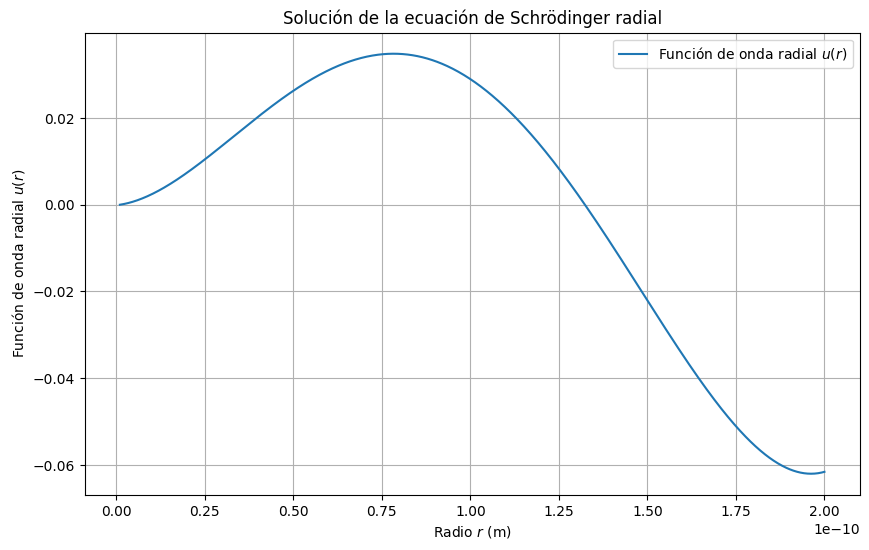

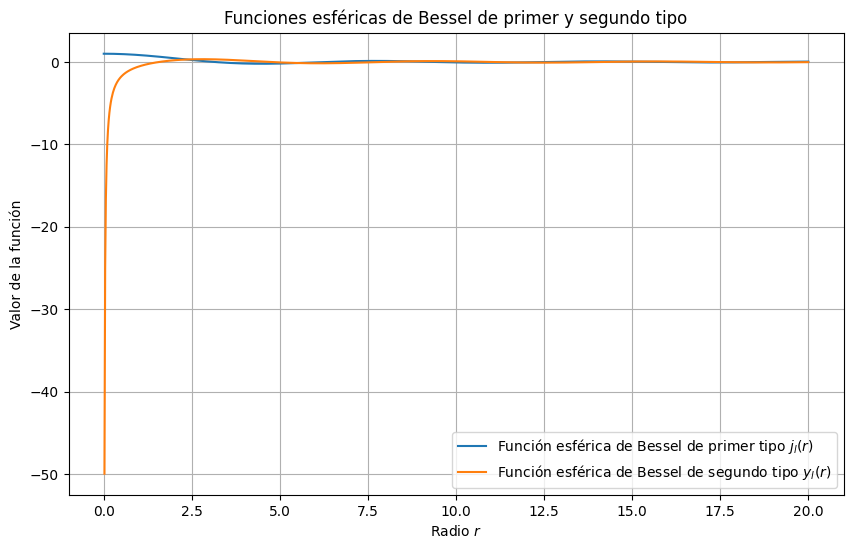

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import spherical_jn, spherical_yn
from scipy.constants import hbar, m_e

# Definir el potencial en coordenadas esféricas (pozo cuadrado esférico)
def potential(r, V0, R):
    return V0 * (r >= R)

# Definir la ecuación de Schrödinger radial
def schrodinger(r, y, l, E, V0, R):
    u, uprime = y
    V = potential(r, V0, R)
    d2u_dr2 = -(2 * m_e / hbar**2) * (E - V - l * (l + 1) * hbar**2 / (2 * m_e * r**2)) * u
    return [uprime, d2u_dr2]

# Parámetros del problema
l = 0  # Número cuántico angular
E = 1.0 * 1.60218e-19  # Energía (en julios)
V0 = -50.0 * 1.60218e-19  # Potencial (en julios)
R = 1e-10  # Radio del pozo (en metros)
r_min = 1e-12  # Límite inferior del rango de integración
r_max = 2e-10  # Límite superior del rango de integración

# Condiciones iniciales (u(0) = 0, u'(0) = 1 arbitrariamente pequeño)
y0 = [0, 1e-10]

# Resolver la ecuación de Schrödinger
sol = solve_ivp(schrodinger, [r_min, r_max], y0, args=(l, E, V0, R), dense_output=True)
r = np.linspace(r_min, r_max, 1000)
u = sol.sol(r)[0]

# Normalizar la función de onda
u /= np.linalg.norm(u)

# Graficar la función de onda
plt.figure(figsize=(10, 6))
plt.plot(r, u, label='Función de onda radial $u(r)$')
plt.xlabel('Radio $r$ (m)')
plt.ylabel('Función de onda radial $u(r)$')
plt.title('Solución de la ecuación de Schrödinger radial')
plt.legend()
plt.grid(True)
plt.show()

# Graficar las funciones esféricas de Bessel de primer y segundo tipo
r_bessel = np.linspace(0, 20, 1000)
j_l = spherical_jn(l, r_bessel)
y_l = spherical_yn(l, r_bessel)

plt.figure(figsize=(10, 6))
plt.plot(r_bessel, j_l, label='Función esférica de Bessel de primer tipo $j_l(r)$')
plt.plot(r_bessel, y_l, label='Función esférica de Bessel de segundo tipo $y_l(r)$')
plt.xlabel('Radio $r$')
plt.ylabel('Valor de la función')
plt.title('Funciones esféricas de Bessel de primer y segundo tipo')
plt.legend()
plt.grid(True)
plt.show()


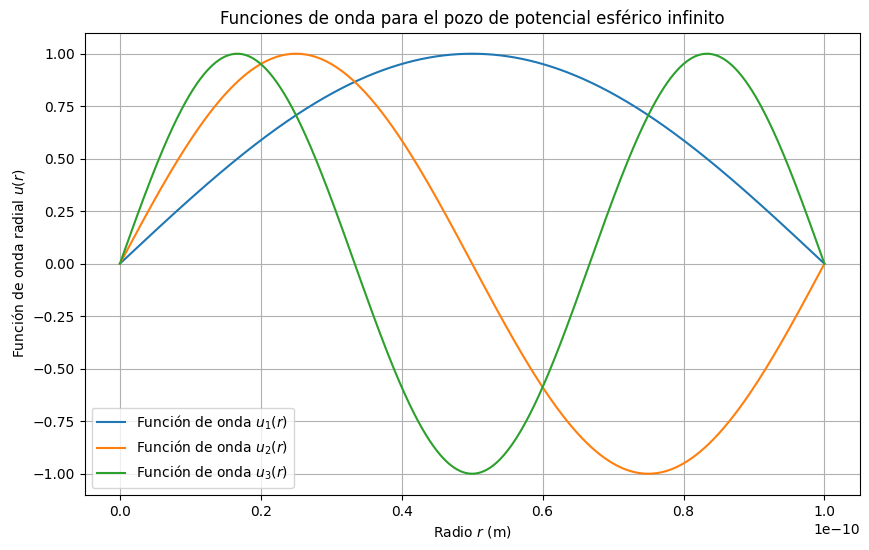

Energía para n=1: 6.02e-18 J (37.60 eV)
Energía para n=2: 2.41e-17 J (150.41 eV)
Energía para n=3: 5.42e-17 J (338.43 eV)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, m_e, pi

# Parámetros del problema
a = 1e-10  # Radio del pozo (en metros)
n_max = 3  # Número máximo de niveles de energía a considerar

# Calcular las energías permitidas
n = np.arange(1, n_max + 1)
E_n = (hbar**2 * n**2 * pi**2) / (2 * m_e * a**2)

# Definir la función de onda u(r) para cada n
def u_n(r, n, a):
    k_n = n * pi / a
    return np.sin(k_n * r)

# Graficar las funciones de onda y las energías permitidas
r = np.linspace(0, a, 1000)

plt.figure(figsize=(10, 6))

for n_val in n:
    u = u_n(r, n_val, a)
    plt.plot(r, u, label=f'Función de onda $u_{n_val}(r)$')

plt.xlabel('Radio $r$ (m)')
plt.ylabel('Función de onda radial $u(r)$')
plt.title('Funciones de onda para el pozo de potencial esférico infinito')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir las energías permitidas
for n_val, E in zip(n, E_n):
    print(f'Energía para n={n_val}: {E:.2e} J ({E / 1.60218e-19:.2f} eV)')
